In [ ]:
!pip install seaborn

In [ ]:
import seaborn as sns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


seaborn 셋팅

In [ ]:
sns.set(context = 'notebook',
        style = 'darkgrid',
        palette = 'deep',
        font_scale=1,
        color_codes=True)

내장데이터 불러오기

In [ ]:
penguins = sns.load_dataset("penguins")

In [ ]:
print(penguins.head())

  species     island  bill_length_mm  ...  flipper_length_mm  body_mass_g     sex
0  Adelie  Torgersen            39.1  ...              181.0       3750.0    Male
1  Adelie  Torgersen            39.5  ...              186.0       3800.0  Female
2  Adelie  Torgersen            40.3  ...              195.0       3250.0  Female
3  Adelie  Torgersen             NaN  ...                NaN          NaN     NaN
4  Adelie  Torgersen            36.7  ...              193.0       3450.0  Female

[5 rows x 7 columns]


In [ ]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'taxis', 'tips', 'titanic']


In [ ]:
tips = sns.load_dataset("tips")

In [ ]:
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


hist()

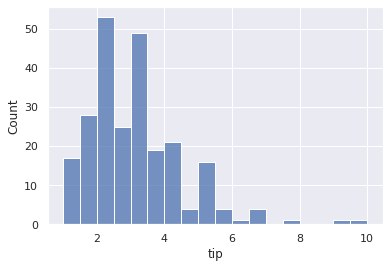

In [ ]:
sns.histplot(data=tips, x="tip")
plt.show()

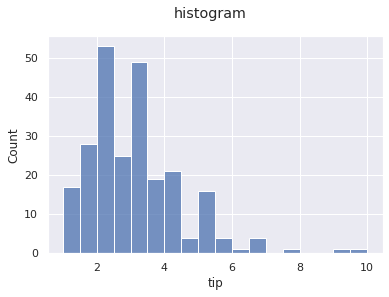

In [ ]:
fig = plt.figure()
fig.suptitle("histogram")
sns.histplot(data = tips, x = "tip")
plt.show()

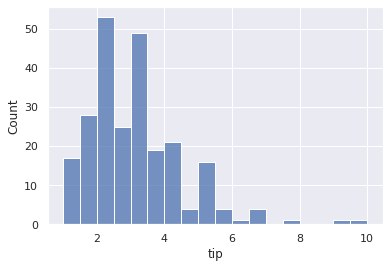

In [ ]:
# 같은 결과 (파라미터 빼도 됨 (data=tips))
sns.histplot(tips, x ="tip")
plt.show()

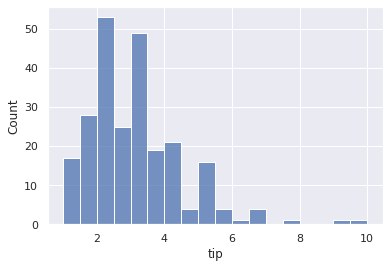

In [ ]:
# 같은 결과 (데이터안 시리즈 가져오기)
sns.histplot(tips.tip)
plt.show()

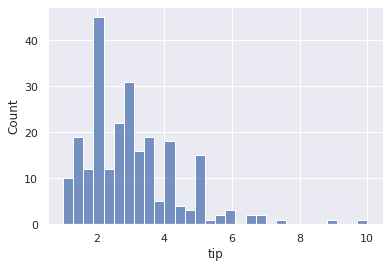

In [ ]:
sns.histplot(tips.tip, bins=30)
plt.show()

(244,)


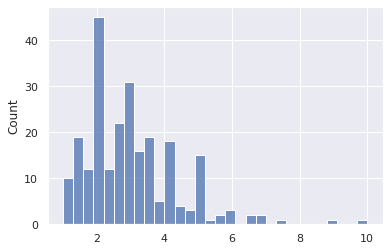

In [ ]:
a = tips.tip.to_numpy()
print(a.shape)

sns.histplot(a, bins=30)
plt.show()

In [ ]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


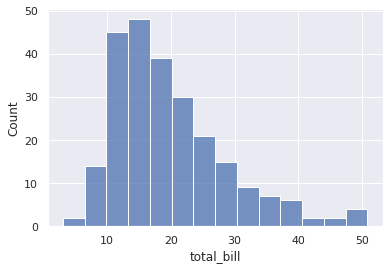

In [ ]:
sns.histplot(tips.total_bill)
plt.show()

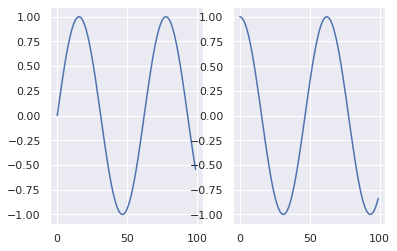

In [ ]:
x = np.linspace(0, 10, 100)

plt.subplot(121)
plt.plot(np.sin(x))

plt.subplot(122)
plt.plot(np.cos(x))

plt.show()

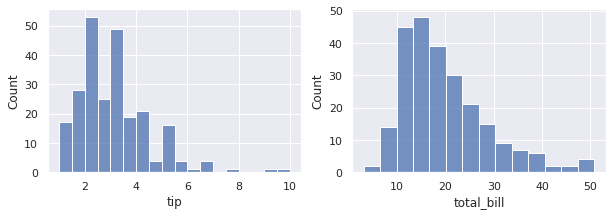

In [ ]:
plt.figure(figsize=(10,3))
plt.subplot(121)
sns.histplot(tips.tip)

plt.subplot(122)
sns.histplot(tips.total_bill)

# x축 y축 반대로 설정하기

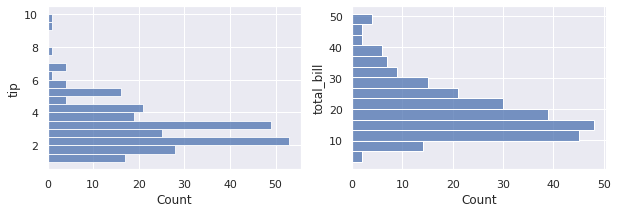

In [ ]:
plt.figure(figsize=(10,3))
plt.subplot(121)
sns.histplot(y= tips.tip)

plt.subplot(122)
sns.histplot(y= tips.total_bill)

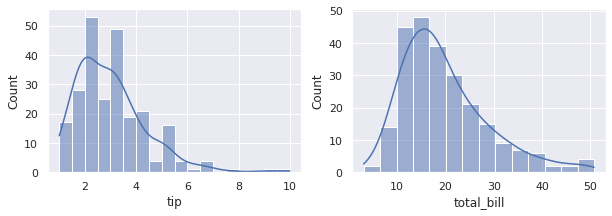

In [ ]:
# 히스토그램에 선그래프 추가 kde
plt.figure(figsize=(10,3))
plt.subplot(121)
sns.histplot(tips.tip, kde=True)

plt.subplot(122)
sns.histplot(tips.total_bill, kde=True)

plt.show()

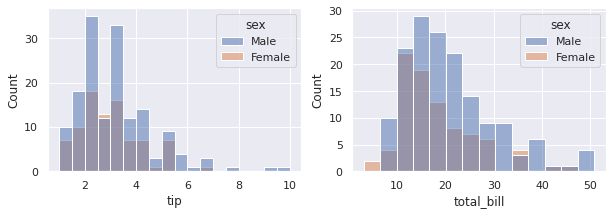

In [ ]:
# 같이 쌓이는게 아니라 따로 hue
plt.figure(figsize=(10,3))
plt.subplot(121)
sns.histplot(tips, x= "tip", hue="sex")

plt.subplot(122)
sns.histplot(tips, x= "total_bill", hue="sex")

plt.show()

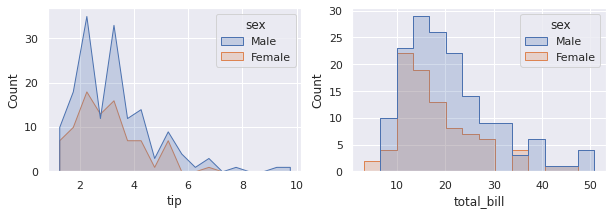

In [ ]:
# 모양 바꾸기 element
plt.figure(figsize=(10,3))
plt.subplot(121)
sns.histplot(tips, x = "tip", hue="sex", element = "poly")

plt.subplot(122)
sns.histplot(tips, x = "total_bill", hue="sex", element ="step")

plt.show()

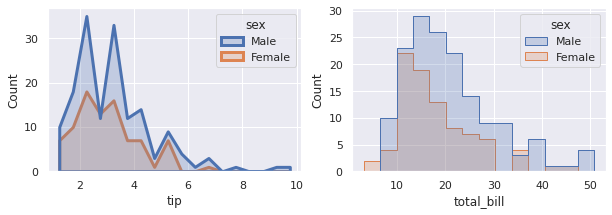

In [ ]:
# 라인 굵기 linewidth
plt.figure(figsize=(10,3))
plt.subplot(121)
sns.histplot(tips, x = "tip", hue="sex", element = "poly", linewidth=3)

plt.subplot(122)
sns.histplot(tips, x = "total_bill", hue="sex", element ="step")

plt.show()

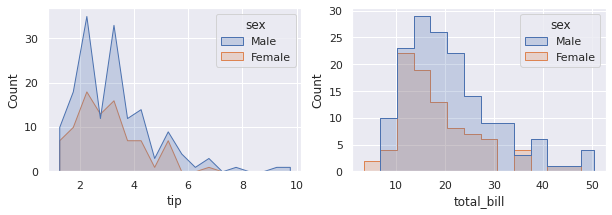

In [ ]:
# 폭지정 shrink
plt.figure(figsize=(10,3))
plt.subplot(121)
sns.histplot(tips, x = "tip", hue="sex", element = "poly")

plt.subplot(122)
sns.histplot(tips, x = "total_bill", hue="sex", element ="step" , shrink=0.8)

plt.show()

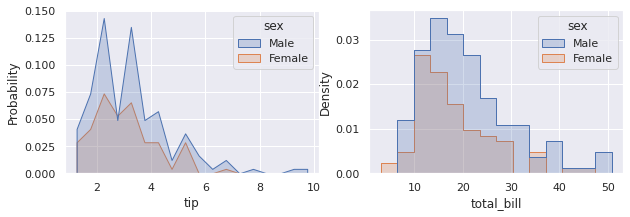

In [ ]:
# 확률,분포값으로 나타내기 stat
plt.figure(figsize=(10,3))
plt.subplot(121)
sns.histplot(tips, x = "tip", hue="sex", element = "poly", stat = "probability")

plt.subplot(122)
sns.histplot(tips, x = "total_bill", hue="sex", element ="step", stat = "density")

plt.show()

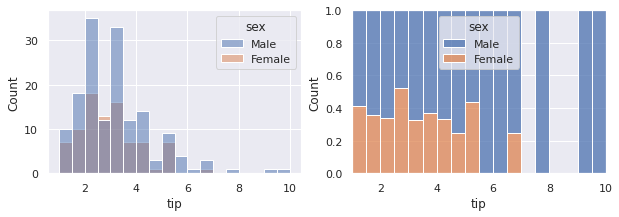

In [ ]:
# 전체를 비율처럼 보이게하기 multiple = "fill"
plt.figure(figsize=(10,3))
plt.subplot(121)
sns.histplot(tips, x = "tip", hue="sex")

plt.subplot(122)
sns.histplot(tips, x = "tip", hue="sex", multiple = "fill")

plt.show()

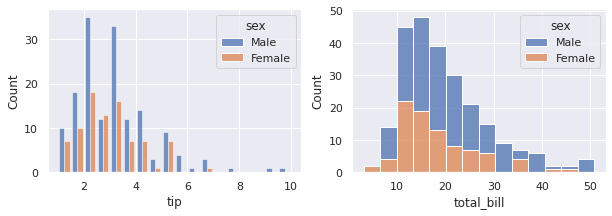

In [ ]:
# 데이터 겹치지 않고 나타내기 multiple ="dodge"
plt.figure(figsize=(10,3))
plt.subplot(121)
sns.histplot(tips, x = "tip", hue="sex", multiple ="dodge", shrink=0.8)

plt.subplot(122)
sns.histplot(tips, x = "total_bill", hue="sex", multiple = "stack")

plt.show()

내장 데이터 가져오기

In [ ]:
planets = sns.load_dataset("planets")
print(planets.head())

            method  number  orbital_period   mass  distance  year
0  Radial Velocity       1         269.300   7.10     77.40  2006
1  Radial Velocity       1         874.774   2.21     56.95  2008
2  Radial Velocity       1         763.000   2.60     19.84  2011
3  Radial Velocity       1         326.030  19.40    110.62  2007
4  Radial Velocity       1         516.220  10.50    119.47  2009


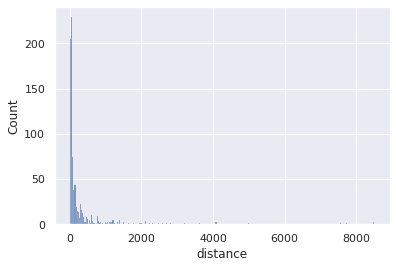

In [ ]:
sns.histplot(planets, x= "distance")
plt.show()

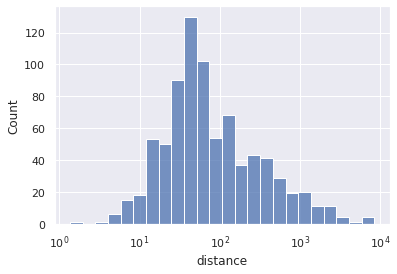

In [ ]:
# 로그화 log_scale =True
sns.histplot(planets, x= "distance", log_scale =True)
plt.show()

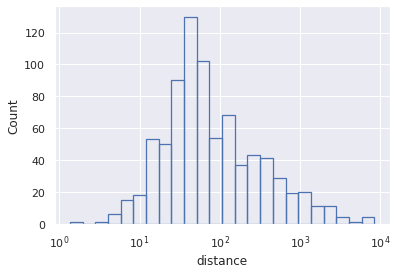

In [ ]:
# 채우기 안함 fill=False
# 디폴트 True
sns.histplot(planets, x= "distance", log_scale =True, fill=False)
plt.show()

# 누적

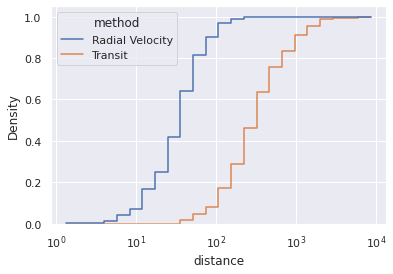

In [ ]:
sns.histplot(
    data=planets, x="distance", hue="method",
    hue_order=["Radial Velocity", "Transit"],
    log_scale=True, element="step", fill=False,
    cumulative=True, stat="density", common_norm=False,
)
plt.show()

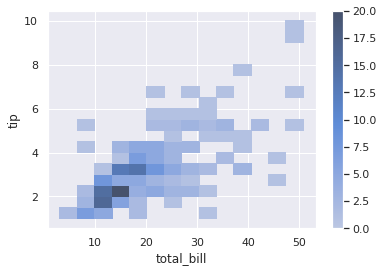

In [ ]:
sns.histplot(tips, x="total_bill", y= "tip", cbar=True)
plt.show() 

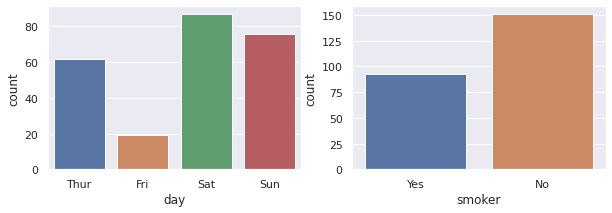

In [ ]:
# 이산형 카운트
plt.figure(figsize=(10,3))
plt.subplot(121)
sns.countplot(data = tips, x = "day")

plt.subplot(122)
sns.countplot(data = tips, x = "smoker")

plt.show()

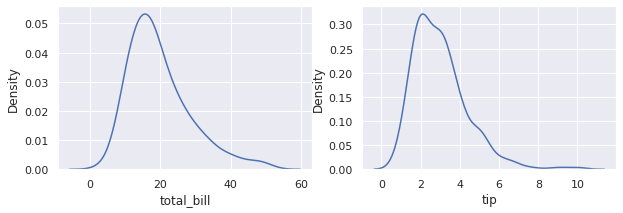

In [ ]:
# 연속형
plt.figure(figsize=(10,3))
plt.subplot(121)
sns.kdeplot(data = tips, x = "total_bill")

plt.subplot(122)
sns.kdeplot(data = tips, x = "tip")

plt.show()

# scatterplot()

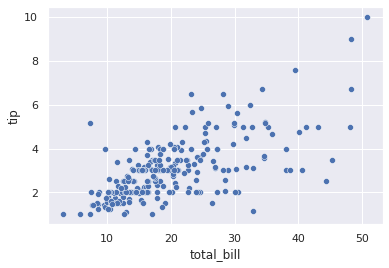

In [ ]:
sns.scatterplot(data=tips, x="total_bill", y="tip")
plt.show()

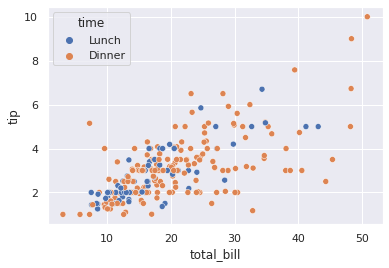

In [ ]:
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="time")
plt.show()

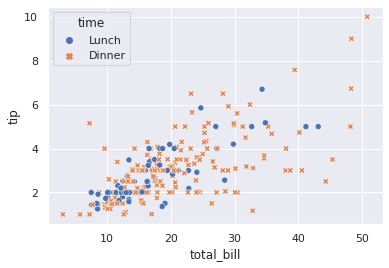

In [ ]:
# 스타일에 구분주기
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="time", style="time")
plt.show()

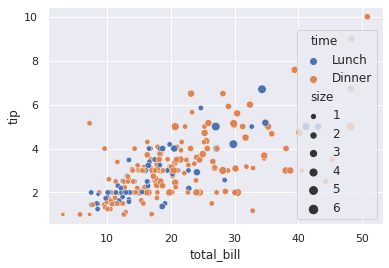

In [ ]:
# 점크기로 정도를 나타냄
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="time", size="size")
plt.show()

# lineplot()

In [ ]:
flights = sns.load_dataset("flights")
print(flights.head())

   year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121


In [ ]:
may_flights = flights.query('month=="May"')
may_flights

,year,month,passengers
4,1949,May,121
16,1950,May,125
28,1951,May,172
40,1952,May,183
52,1953,May,229
64,1954,May,234
76,1955,May,270
88,1956,May,318
100,1957,May,355
112,1958,May,363


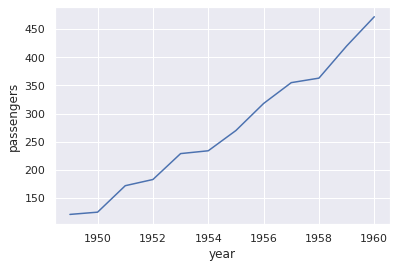

In [ ]:
sns.lineplot(data=may_flights, x="year", y="passengers")
plt.show()

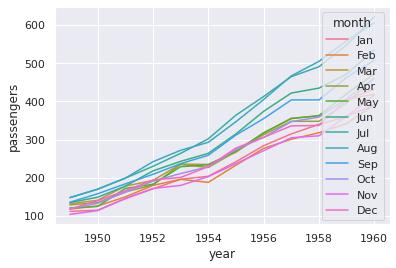

In [ ]:
sns.lineplot(data=flights, x="year", y="passengers", hue="month")
plt.show()

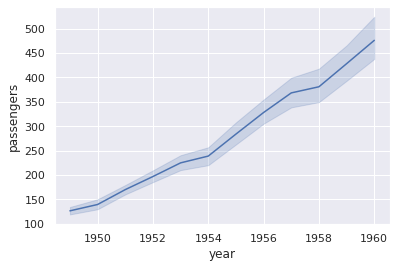

In [ ]:
sns.lineplot(data=flights, x="year", y="passengers")
plt.show()

In [ ]:
fmri = sns.load_dataset("fmri")
fmri

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


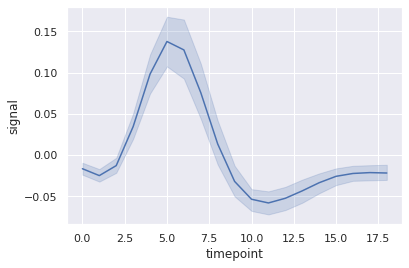

In [ ]:
sns.lineplot(data=fmri, x="timepoint", y="signal")
plt.show()

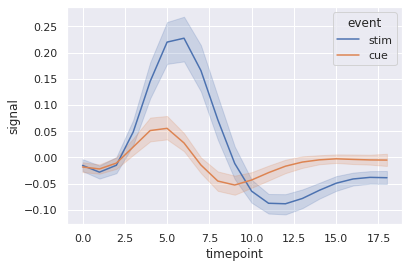

In [ ]:
sns.lineplot(data=fmri, x="timepoint", y="signal", hue="event")
plt.show()

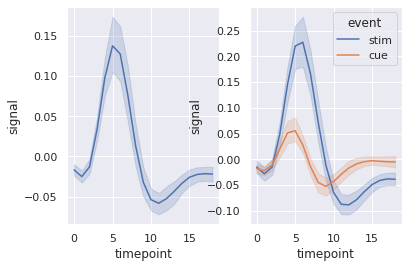

In [ ]:

plt.subplot(121)
sns.lineplot(data=fmri, x="timepoint", y="signal")

plt.subplot(122)
sns.lineplot(data=fmri, x="timepoint", y="signal", hue="event")

plt.show()

# boxplot()

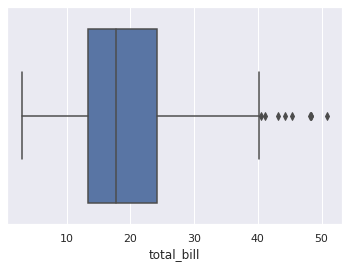

In [ ]:
sns.boxplot(x=tips.total_bill)
plt.show()

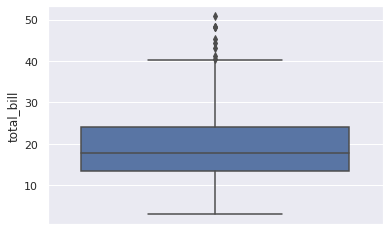

In [ ]:
sns.boxplot(y=tips.total_bill)
plt.show()

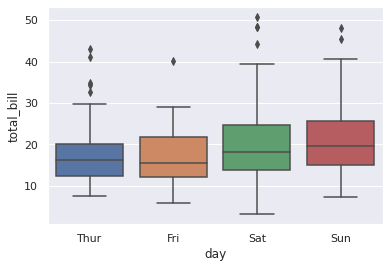

In [ ]:
sns.boxplot(data=tips, x="day", y="total_bill")
plt.show()

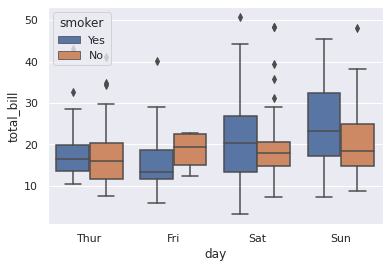

In [ ]:
sns.boxplot(data=tips, x="day", y="total_bill", hue="smoker")
plt.show()

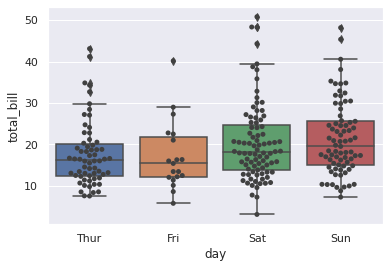

In [ ]:
sns.boxplot(data=tips, x="day", y="total_bill")
sns.swarmplot(data=tips, x="day", y="total_bill", color="0.25")
plt.show()